In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Zbiór apartments
### Cel: predykcja ceny mieszkania za m<sup>2</sup>

In [229]:
#Wczytanie zbioru pochodzącego z R-owego DALEX
df1 = pd.read_csv("apartments.csv")

### Przegląd zbioru

In [230]:
df1.head(5)

,m2.price,construction.year,surface,floor,no.rooms,district
0,5897,1953,25,3,1,Srodmiescie
1,1818,1992,143,9,5,Bielany
2,3643,1937,56,1,2,Praga
3,3517,1995,93,7,3,Ochota
4,3013,1992,144,6,5,Mokotow


Dane są kompletne, tylko jedna ze zmiennych jest kategoryczna.

In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   m2.price           1000 non-null   int64 
 1   construction.year  1000 non-null   int64 
 2   surface            1000 non-null   int64 
 3   floor              1000 non-null   int64 
 4   no.rooms           1000 non-null   int64 
 5   district           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [232]:
df1.describe()

,m2.price,construction.year,surface,floor,no.rooms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3487.019000,1964.823000,85.590000,5.623000,3.360000
std,906.691651,25.831511,37.874799,2.899876,1.381415
min,1607.000000,1920.000000,20.000000,1.000000,1.000000
25%,2857.000000,1943.000000,53.000000,3.000000,2.000000
50%,3386.000000,1965.000000,85.500000,6.000000,3.000000
75%,4018.250000,1988.000000,118.000000,8.000000,4.000000
max,6595.000000,2010.000000,150.000000,10.000000,6.000000


Rozkład zmiennej kategorycznej.

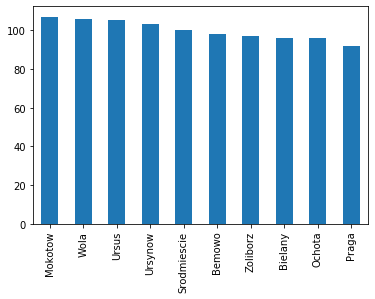

In [233]:
df1.district.value_counts().plot(kind = 'bar')

Rozkład zmiennej, która definiuje dzielnicę, jest równomierny. Liczba kategorii pozwoli zastosować one-hot encoding bez nadmiernego zwiększania liczby kolumn. 

In [234]:
df1 = pd.get_dummies(df1, drop_first=True)
df1.head(5)

,m2.price,construction.year,surface,floor,no.rooms,district_Bielany,district_Mokotow,district_Ochota,district_Praga,district_Srodmiescie,district_Ursus,district_Ursynow,district_Wola,district_Zoliborz
0,5897,1953,25,3,1,0,0,0,0,1,0,0,0,0
1,1818,1992,143,9,5,1,0,0,0,0,0,0,0,0
2,3643,1937,56,1,2,0,0,0,1,0,0,0,0,0
3,3517,1995,93,7,3,0,0,1,0,0,0,0,0,0
4,3013,1992,144,6,5,0,1,0,0,0,0,0,0,0


In [235]:
#Podział na zbiór i zmienną przewidywaną
X_apartments = df1.drop('m2.price', axis=1)
y_apartments = df1['m2.price']

# Własny zbiór
### Beijing PM2.5
### Cel: predykcja stężenia PM2.5 w powietrzu
Źródło: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data  
Zbiór to wyniki pomiarów pyłu PM2.5 w Pekinie połączone z danymi meteorologicznymi.

In [236]:
df2 = pd.read_csv("beijing.csv")

In [237]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


Jak widać dla części obserwacji brakuje pomiaru PM2.5. Jako, że jest to zmienna, którą chcę przewidywać, usunę te rekordy ze zbioru.  
Ze względów obliczeniowych wybiorę losową próbkę 10000 obserwacji. 

In [238]:
df2 = df2.dropna()

In [239]:
df2 = df2.sample(n=10000, random_state=42)

In [240]:
df2.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
27120,27121,2013,2,4,0,215.0,-7,-7.0,1020.0,NW,16.10,0,0
35861,35862,2014,2,3,5,6.0,-31,-2.0,1027.0,NW,13.86,0,0
28100,28101,2013,3,16,20,280.0,3,10.0,1020.0,SE,29.05,0,0
29250,29251,2013,5,3,18,57.0,4,21.0,1015.0,SE,12.96,0,0
34096,34097,2013,11,21,16,50.0,-12,11.0,1024.0,cv,2.68,0,0


Objaśnienie zmiennych:
- No: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- pm2.5: PM2.5 concentration (ug/m^3)
- DEWP: Dew Point (â„ƒ)
- TEMP: Temperature (â„ƒ)
- PRES: Pressure (hPa)
- cbwd: Combined wind direction
- Iws: Cumulated wind speed (m/s)
- Is: Cumulated hours of snow
- Ir: Cumulated hours of rain

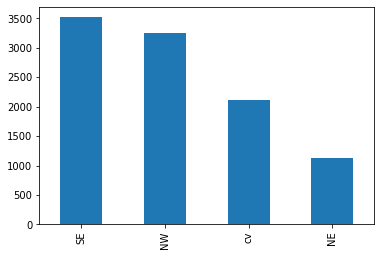

In [241]:
df2.cbwd.value_counts().plot(kind='bar')

Kolumny do modyfikacji:
- No: jest to indeks do usunięcia
- cbwd (combined wind direction): one-hot encoding

In [242]:
df2 = df2.drop('No', axis=1)
df2 = pd.get_dummies(df2, drop_first=True)

In [243]:
#Podział na zbiór i zmienną przewidywaną
X_pm = df2.drop('pm2.5', axis=1)
y_pm = df2['pm2.5']

# Skalowanie danych
### Metodologia:
- Każdy ze zbiorów podzielę na część treningową i testową.
- W celu sprawdzenia czy skalowanie jest istotne dla algorytmu SVM przygotują dwie wersje powyższych zbiorów: nieskalowaną i skalowaną.
- Dla każdego z otrzymanych czterech zbiorów przeprowadzę dostrajanie modelu metodą random search.
- Obliczę metryki na zbiorach testowych i porównam rezultaty.

In [244]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils.fixes import loguniform

In [245]:
#Train-test split
apart_train, apart_test, apart_y_train, apart_y_test = train_test_split(X_apartments, y_apartments)
pm_train, pm_test, pm_y_train, pm_y_test = train_test_split(X_pm, y_pm)

In [246]:
###skalowanie
#apartments
scaler_apartments = MinMaxScaler()
apart_train_sc = scaler_apartments.fit_transform(apart_train)
apart_test_sc = scaler_apartments.transform(apart_test)

In [247]:
#pm
scaler_pm = MinMaxScaler()
pm_train_sc = scaler_pm.fit_transform(pm_train)
pm_test_sc = scaler_pm.transform(pm_test)

In [248]:
#Parametry do random search

parameters = dict({'C': loguniform(1e-2, 1e1),
              'gamma': loguniform(1e-4, 1e-1),
              'epsilon': loguniform(1e-3, 1e1)})

In [281]:
#Modelowanie

def score_on_df(X_train, X_test, y_train, y_test, params, it):
    
    svm = SVR(kernel='rbf')
    
    #Random search cv ocena według miary R2
    random_cv = RandomizedSearchCV(estimator=svm, 
                                   param_distributions=params,
                                   n_iter=it,
                                   n_jobs=-1,
                                   scoring='r2',
                                   random_state=42)
    
    random_cv.fit(X_train, y_train)
    best_model = random_cv.best_estimator_
    
    print(best_model)
    print(random_cv.best_score_)
    
    prediction = best_model.predict(X_test)
    
    r2 = r2_score(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    
    return([r2, rmse], prediction)

In [282]:
#Rezultat apartments - skalowane 
result_apart_sc, p1 = score_on_df(apart_train_sc, apart_test_sc, apart_y_train, apart_y_test, parameters, 50)

SVR(C=7.0251663392421575, cache_size=200, coef0=0.0, degree=3,
    epsilon=7.286653737491036, gamma=0.02661901888489055, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.018758451994312676


In [283]:
#Rezultat apartments - nieskalowane
result_apart, p2 = score_on_df(apart_train, apart_test, apart_y_train, apart_y_test, parameters, 50)

SVR(C=9.133995846860971, cache_size=200, coef0=0.0, degree=3,
    epsilon=1.2273800987852959, gamma=0.0003945908811099999, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.17138780458268035


In [284]:
#Rezultat pm - skalowane
result_pm_sc, p3 = score_on_df(pm_train_sc, pm_test_sc, pm_y_train, pm_y_test, parameters, 10)

SVR(C=1.331121608073688, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0012087541473056955, gamma=0.08123245085588685, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.023547951163532633


In [285]:
#Rezultat pm - nieskalowane
result_pm, p4 = score_on_df(pm_train, pm_test, pm_y_train, pm_y_test, parameters, 10)

SVR(C=3.1428808908401082, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007068974950624601, gamma=0.0003511356313970406, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.21381753025013106


In [289]:
def plot_diff(true, pred, title):
    plt.scatter(x = true, y = pred)
    plt.plot([min(true), max(true)], [min(pred), max(pred)], color='k', linestyle='-', linewidth=2)
    plt.title(title)
    plt.xlabel("Wartości oryginalne")
    plt.ylabel("Predykcja")

## Miary na zbiorze testowym: apartments

In [286]:
summ_apart = pd.DataFrame([result_apart_sc, result_apart], 
                          columns=["R2", "RMSE"], 
                          index=["skalowane", "nieskalowane"])

In [287]:
summ_apart

,R2,RMSE
skalowane,0.046584,892.775041
nieskalowane,0.226075,804.359785


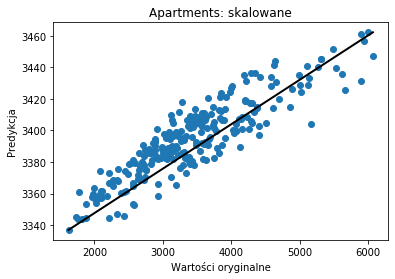

In [290]:
plot_diff(apart_y_test, p1, "Apartments: skalowane")

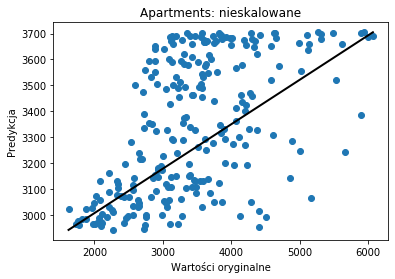

In [291]:
plot_diff(apart_y_test, p2, "Apartments: nieskalowane")

Wyniki metryk dla modelu na zbiorze apartments są dość mylące. Wskazują one na lepsze predykcje modelu na danych nieskalowanych. Graficzna analiza porównująca wartości oryginalne z przewidywanymi pokazuje, że to na danych skalowanych model poradził sobie znacznie lepiej, uzyskując dobre dopasowanie.

## Miary na zbiorze testowym: Beijing PM2.5

In [292]:
summ_pm = pd.DataFrame([result_pm_sc, result_pm], 
                          columns=["R2", "RMSE"], 
                          index=["skalowane", "nieskalowane"])

In [293]:
summ_pm

,R2,RMSE
skalowane,0.031034,87.795709
nieskalowane,0.238419,77.835402


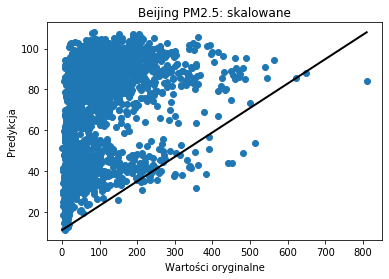

In [294]:
plot_diff(pm_y_test, p3, "Beijing PM2.5: skalowane")

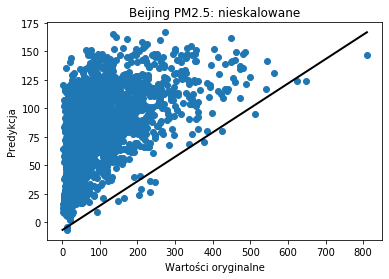

In [295]:
plot_diff(pm_y_test, p4, "Beijing PM2.5: nieskalowane")

Zbiór danych PM2.5 okazał się zbyt skomplikowany dla wytrenowanego modelu. Zarówno metryki jak i graficzna analiza sugerują słabą zdolność modelu do trafnych predykcji. W przypadku danych skalowanych możemy jednak zauważyć, że model zachowywał się inaczej niż dla danych nieskalowanych.